In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
# Loading data

path = "./data/n90pol.csv"
df = pd.read_csv(path)
print(df.head())

amy = df['amygdala'].to_numpy()
acc = df['acc'].to_numpy()

   amygdala     acc  orientation
0    0.0051 -0.0286            2
1   -0.0674  0.0007            3
2   -0.0257 -0.0110            3
3    0.0504 -0.0167            2
4    0.0125 -0.0005            5


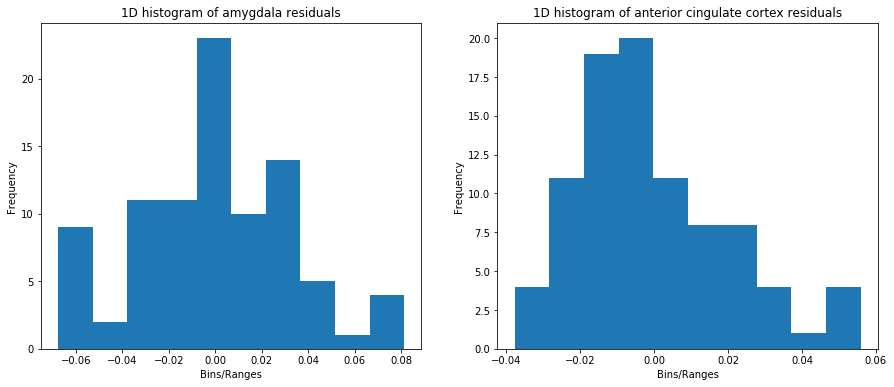

In [3]:
# Generating 1D histogram in one way 

counts_amy, bins_amy = np.histogram(amy, bins=10)
counts_acc, bins_acc = np.histogram(acc, bins=10)
'''
plt.hist(bins_amy[:-1], bins_amy, weights=counts_amy)
plt.title("1D histogram of amygdala residuals")
plt.xlabel("Bins/Ranges")
plt.ylabel("Frequency")
'''
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].hist(bins_amy[:-1], bins_amy, weights=counts_amy)
ax[0].set_title("1D histogram of amygdala residuals")
ax[0].set_xlabel("Bins/Ranges")
ax[0].set_ylabel("Frequency")

ax[1].hist(bins_acc[:-1], bins_acc, weights=counts_acc)
ax[1].set_title("1D histogram of anterior cingulate cortex residuals")
ax[1].set_xlabel("Bins/Ranges")
ax[1].set_ylabel("Frequency")

plt.show()

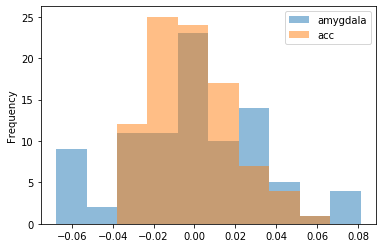

In [4]:
# A different way to visualize 1D histogram 

df[['amygdala', 'acc']].plot.hist(bins=10, alpha = 0.5)

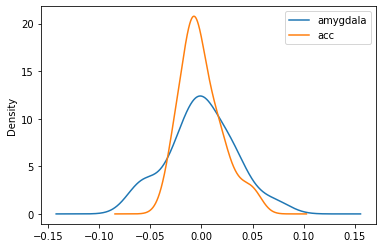

In [5]:
# Generating 1D Gaussian KDE

df[['amygdala', 'acc']].plot.kde(bw_method='silverman')

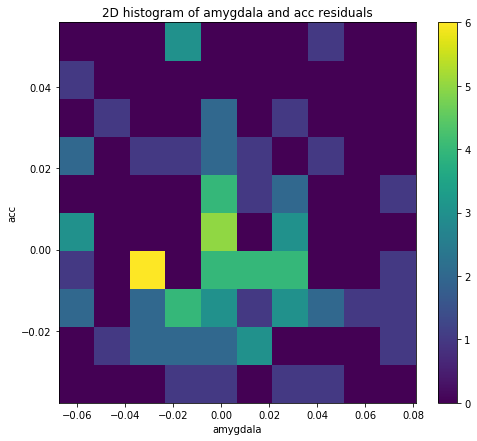

In [6]:
# Generating 2D histogram 
plt.figure(figsize=(8, 7))
plt.hist2d(amy, acc, bins=10)
plt.title("2D histogram of amygdala and acc residuals")
plt.xlabel("amygdala")
plt.ylabel("acc")
plt.colorbar()

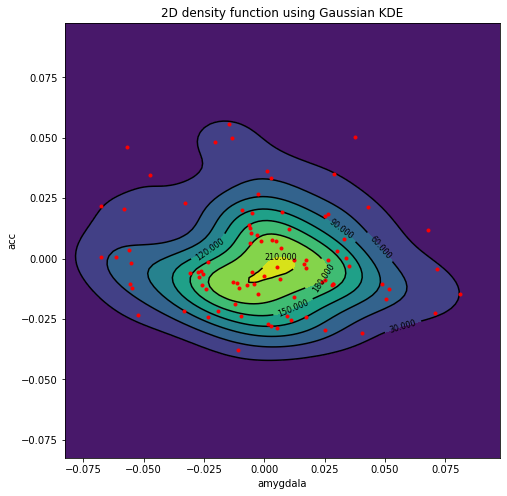

In [23]:
ax_min = np.min(df[['amygdala', 'acc']].to_numpy())
ax_max = np.max(df[['amygdala', 'acc']].to_numpy())
ax_min -= .1*(ax_max - ax_min)
ax_max += .1*(ax_max - ax_min)

xx, yy = np.mgrid[ax_min:ax_max:100j,ax_min:ax_max:100j]
pos = np.vstack([xx.ravel(), yy.ravel()])
data = np.vstack([amy, acc])

# bandwidth method is Silverman's rule
kde = gaussian_kde(data, bw_method='silverman')
kde = np.reshape(kde(pos).T, xx.shape)

fig = plt.figure(figsize=(8, 8))

# current axes
ax = fig.gca()

ax.set_xlim(ax_min, ax_max)
ax.set_ylim(ax_min, ax_max)

# filled contour plot
cfset = ax.contourf(xx, yy, kde)

# KDE
ax.imshow(np.rot90(kde), extent=[ax_min, ax_max, ax_min, ax_max])
# contour plot
cset = ax.contour(xx, yy, kde, colors='k')
# Label plot
ax.clabel(cset, inline=1, fontsize=8)

ax.set_title("2D density function using Gaussian KDE")
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')

#toggle data points overlap
plt.plot(amy, acc, 'r.')
plt.show()

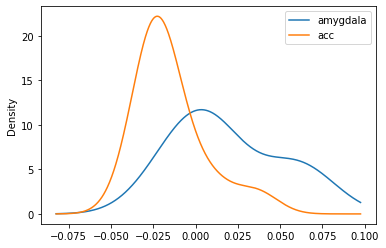

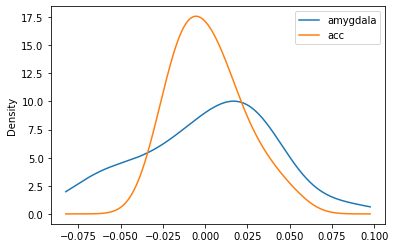

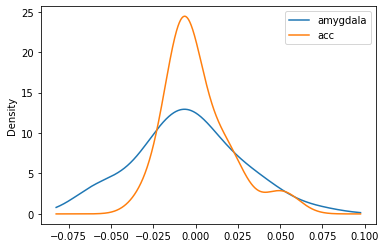

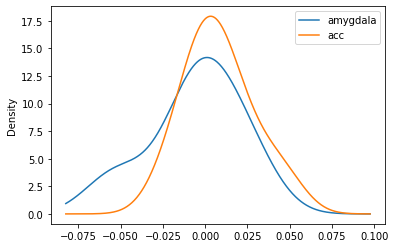

In [25]:
# Plotting conditional distributions 

ind = np.linspace(ax_min, ax_max, 1000)

# c = 2
df[df['orientation'] == 2][['amygdala', 'acc']].plot.kde(bw_method='silverman', ind=ind)

# c = 3
df[df['orientation'] == 3][['amygdala', 'acc']].plot.kde(bw_method='silverman', ind=ind)

# c = 4
df[df['orientation'] == 4][['amygdala', 'acc']].plot.kde(bw_method='silverman', ind=ind)

# c = 5
df[df['orientation'] == 5][['amygdala', 'acc']].plot.kde(bw_method='silverman', ind=ind)


In [28]:
# Computing conditional sample means for each brain region

c2 = df[df['orientation'] == 2][['amygdala', 'acc']].to_numpy()
c3 = df[df['orientation'] == 3][['amygdala', 'acc']].to_numpy()
c4 = df[df['orientation'] == 4][['amygdala', 'acc']].to_numpy()
c5 = df[df['orientation'] == 5][['amygdala', 'acc']].to_numpy()

#amygdala, acc
print(np.mean(c2, axis=0))
print(np.mean(c3, axis=0))
print(np.mean(c4, axis=0))
print(np.mean(c5, axis=0))

[ 0.01906154 -0.01476923]
[0.0005875  0.00167083]
[-0.00471951  0.00130976]
[-0.00569167  0.00814167]


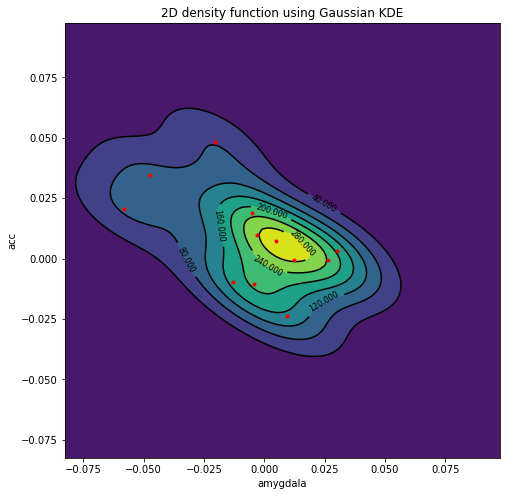

In [40]:
# Plotting conditional joint distrubitions 
# Same 2D KDE code as before just toggling the data to be plotted based on orientation 

ax_min = np.min(df[['amygdala', 'acc']].to_numpy())
ax_max = np.max(df[['amygdala', 'acc']].to_numpy())
ax_min -= .1*(ax_max - ax_min)
ax_max += .1*(ax_max - ax_min)

xx, yy = np.mgrid[ax_min:ax_max:100j,ax_min:ax_max:100j]
pos = np.vstack([xx.ravel(), yy.ravel()])

# TOGGLE DATA
data = np.vstack([c5[:,0], c5[:,1]])

# bandwidth method is Silverman's rule
kde = gaussian_kde(data, bw_method='silverman')
kde = np.reshape(kde(pos).T, xx.shape)

fig = plt.figure(figsize=(8, 8))

# current axes
ax = fig.gca()

ax.set_xlim(ax_min, ax_max)
ax.set_ylim(ax_min, ax_max)

# filled contour plot
cfset = ax.contourf(xx, yy, kde)

# KDE
ax.imshow(np.rot90(kde), extent=[ax_min, ax_max, ax_min, ax_max])
# contour plot
cset = ax.contour(xx, yy, kde, colors='k')
# Label plot
ax.clabel(cset, inline=1, fontsize=8)

ax.set_title("2D density function using Gaussian KDE")
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')

#toggle data points overlap
plt.plot(c5[:,0], c5[:,1], 'r.')
plt.show()